In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(" titanic.csv")

In [3]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age'>

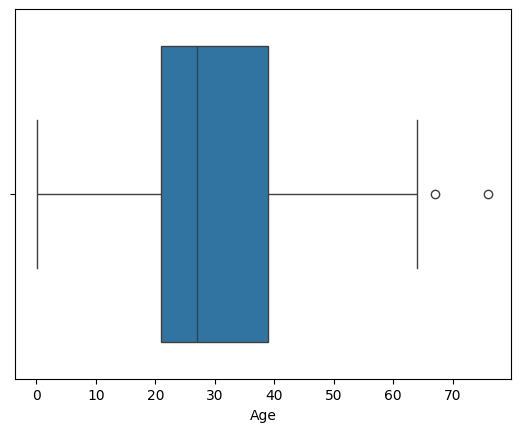

In [5]:
sns.boxplot(x=df["Age"])

In [6]:
percentile25=df["Age"].quantile(0.25)

In [7]:
print(percentile25)

21.0


In [8]:
percentile75=df["Age"].quantile(0.75)

In [9]:
print(percentile75)

39.0


In [10]:
IQR=percentile75-percentile25
IQR

np.float64(18.0)

In [11]:
upper_limit = percentile75 + 1.5*IQR
upper_limit

np.float64(66.0)

In [12]:
lower_limit = percentile25 -1.5*IQR
lower_limit

np.float64(-6.0)

# Find The Outlier

In [13]:
df[df["Age"]>upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [14]:
df[df["Age"]>lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


# Apply CCA on Data

In [15]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [16]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.50 and df[var].isnull().mean()>0]
cols

['Age', 'Fare']

In [17]:
df[cols].sample(5)

,Age,Fare
102,NaN,7.7500
181,37.0,83.1583
394,29.0,22.0250
70,24.0,7.7500
413,NaN,8.0500


In [18]:
len(df[cols].dropna())/len(df)

0.7918660287081339

In [19]:
new_df = df[cols].dropna()
df.shape, new_df. shape

((418, 12), (331, 2))

In [20]:

import matplotlib.pyplot as plt

<Axes: >

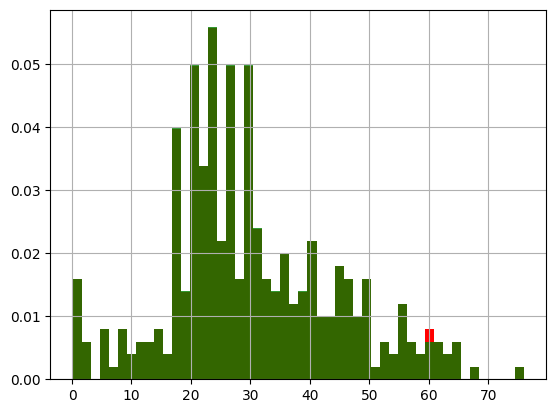

In [21]:
fig=plt.figure()
ax=fig.add_subplot(111)
# original data
df['Age' ].hist(bins=50, ax=ax, density=True, color='red' )

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df["Age"].hist(bins=50,ax=ax,color='green', density=True, alpha=0.8)


In [23]:
temp = pd.concat([
        # percentage of observations per category, original data
        df['Age'].value_counts() / len(df),
        
        # percentage of observations per category, cca data
        new_df['Age'].value_counts() / len(new_df)
        ],
        axis=1)
        
# add column names
temp.columns = ['original', 'cca']      
temp

,original,cca
Age,,
21.0,0.040670,0.051360
24.0,0.040670,0.051360
22.0,0.038278,0.048338
30.0,0.035885,0.045317
18.0,0.031100,0.039275
...,...,...
44.0,0.002392,0.003021
5.0,0.002392,0.003021
51.0,0.002392,0.003021
